# **6조**

## 1. 매개변수 갱신 방법
(총 25점)

#### 1.1 다음 중 각 옵티마이저에 관한 설명으로 옳지 않은 것은? (3점)

1. SGD(Stochastic Gradient Descent)는 모든 파라미터에 대해 동일한 학습률을 사용한다.
2. Momentum은 과거의 기울기를 고려하여 빠르게 수렴하도록 도와준다.
3. AdaGrad는 학습률을 점진적으로 증가시켜 적응형 학습을 수행한다.
4. Adam은 Momentum과 AdaGrad의 장점을 결합한 옵티마이저이다.
5. Adam의 학습률은 처음에는 크게 설정되지만, 시간이 지남에 따라 감소한다.

답 : 

#### 1.2 SGD는 매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복함으로써 최적해를 구하는 방법입니다. 아래 그림을 참고해서 코드의 빈칸을 채워 SGD를 구현해주세요. (5점)

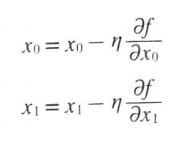

In [2]:
# (문제 아님)수치미분을 이용해 기울기를 구하는 함수입니다. 실행해주세요.

def numerical_gradient(f, x) :
    h = 1e-4
    # x와 형상이 같은 배열 생성
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2) / (2*h)
        x[idx] = tmp_val

    return grad

In [3]:
# '???'를 채워주세요!

def gradient_descent(f, init_x, lr=0.01, step_num=100):

    # 초깃값 설정
    x = ???

    # step_num 만큼 반복하면서 기울기를 구하고 가중치 갱신
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= ??? * ???

    return x

위에서 정의한 함수를 통해 f(x0, x1) = x0^2+x1^2 이 최소가 되는 (x0, x1)을 구해봅시다. f(x0, x1) = x0^2+x1^2은 3차원 공간 상에서 다음과 같이 생긴 함수입니다.

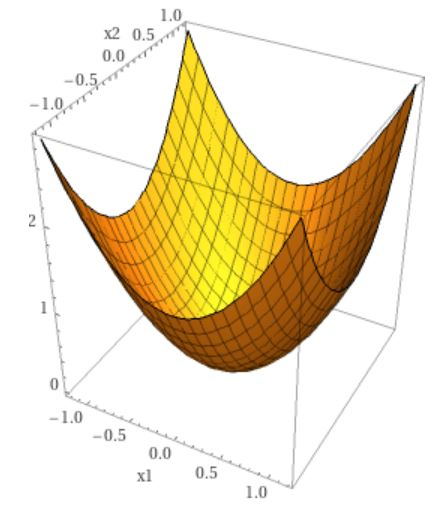

위 그림에서 알 수 예상할 수 있는 것처럼 최적해가 (0, 0)인지 확인해보세요.

In [5]:
# '???'를 채워주세요.

import numpy as np

# 함수 지정
def function(x):
    return x[0]**2 + x[1]**2

# 초깃값 설정
init_x = np.array([-3.0, 4.0])

# 위에서 정의한 gradient_descent 함수를 이용해 함숫값이 최소가 되는 x를 구해주세요.
# learning_rate은 0.1, step_num은 100으로 설정해주세요.
result = ???
print(result)

[-6.11110793e-10  8.14814391e-10]


#### 1.3  아래는 SGD와 Momentum에 의한 최적화 갱신 경로를 각각 시각화한 그림입니다. 모멘텀에서 지그재그 움직임이 줄어드는 이유를 서술해주세요. (5점)

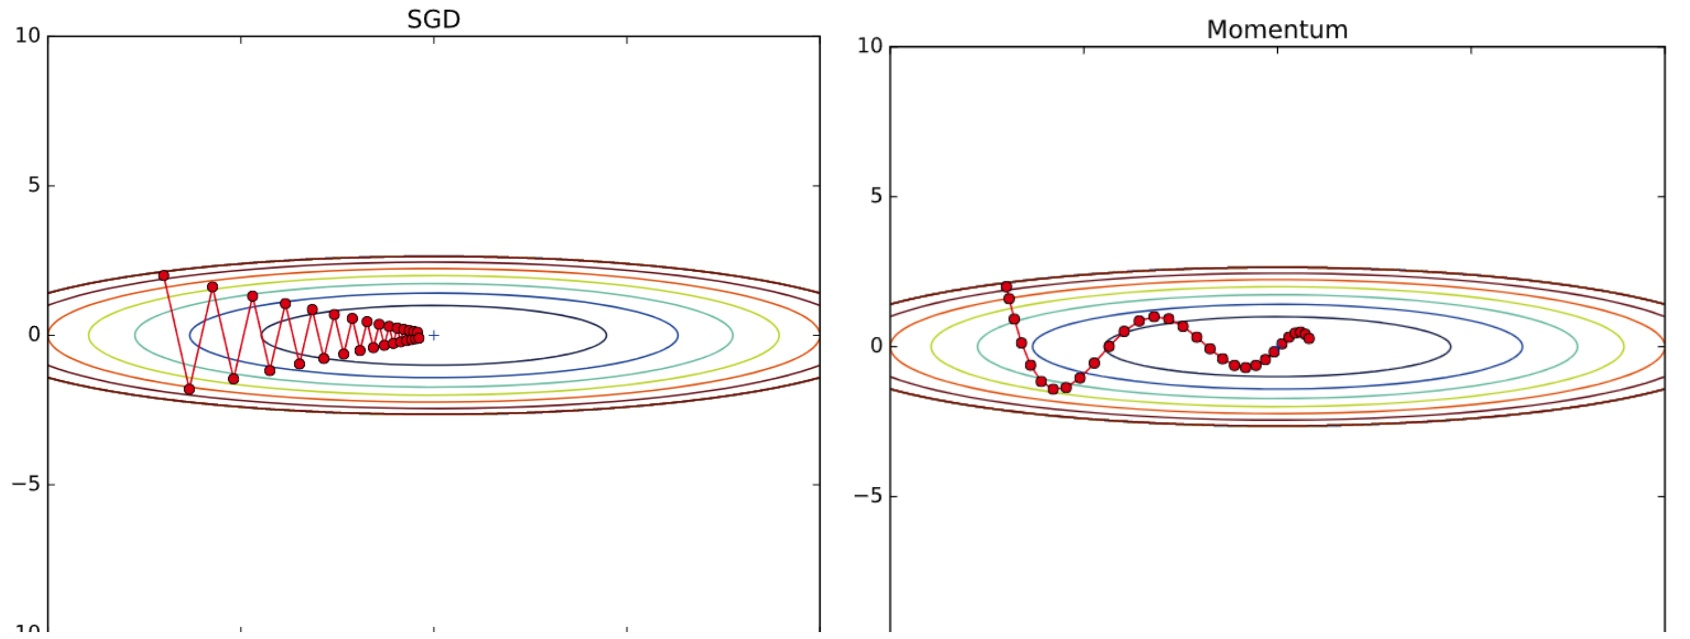

답 : 

#### 1.4 아래는 AdaGrad optimizer에서 가중치를 업데이트하는 방식을 구현한 코드입니다. 수식을 참고하여 다음 빈칸을 채우세요. (5점, 각 1점)

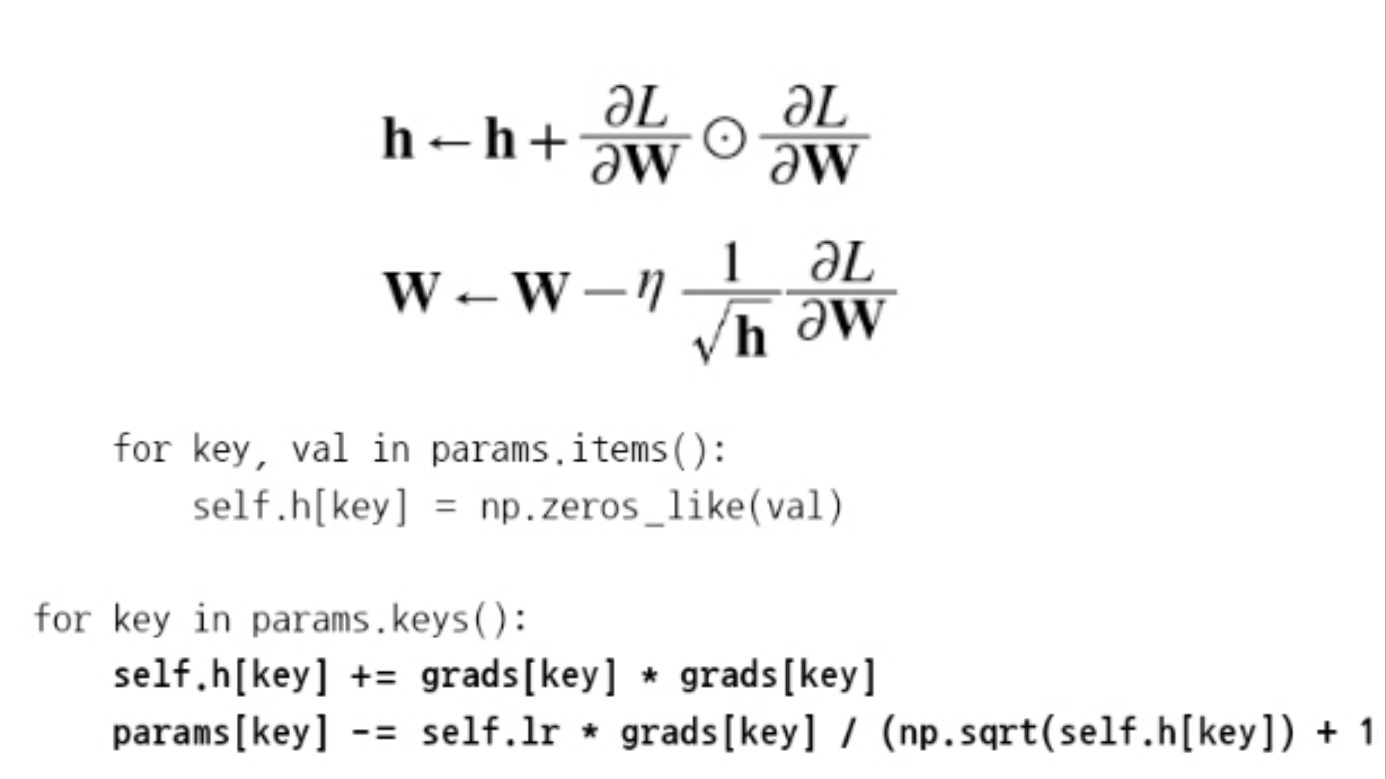

1. self.h[key] : AdaGrad 옵티마이저에서 각 파라미터의 기울기의 (ㅇㅇ)을 누적하여 저장하고 학습률을 조정함.
2. grads[key] : 현재 미니배치에 대한 각 파라미터의 (ㅇㅇㅇ)
3. params[key] : 현재 최적화 중인 모델 파라미터.
4. self.lr : (ㅇㅇㅇ)
5. 1e-7 : 분모에 더해져 분모가 (ㅇ)이 되는 것을 방지함.
6. self.h[key] += grads[key] * grads[key] : 각 파라미터의 기울기의 제곱을 누적하여 self.h[key]에 더함.
7. params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) : 학습률과 기울기를 사용하여 현재의 파라미터 값을 (ㅇㅇㅇㅇ)

#### 1.5 다음은 각 최적화 기법으로 f(x,y) = x^2 / 20 + y^2의 최적해를 찾는 과정을 나타낸 코드입니다. 코드의 빈 칸을 채우고 물음에 답하세요. (3점)

In [16]:
#(문제 아님) 그대로 실행하세요.

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

# 함수와 그라디언트 정의
def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

# 최적화 기법 클래스 정의
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        for key in params.keys():
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key] ** 2)
            
            m_hat = self.m[key] / (1 - self.beta1 ** self.iter)
            v_hat = self.v[key] / (1 - self.beta2 ** self.iter)
            
            params[key] -= self.lr * m_hat / (np.sqrt(v_hat) + 1e-7)

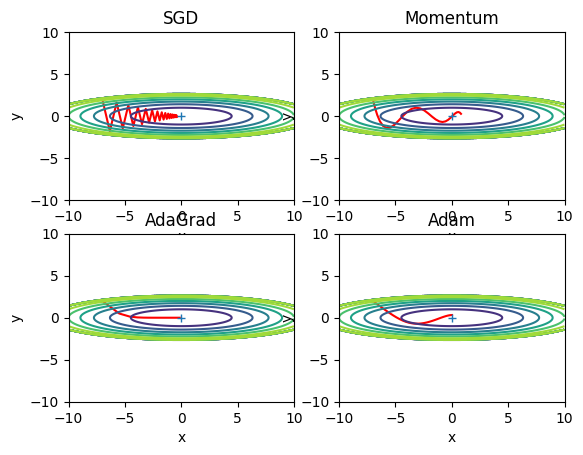

In [20]:
# 초기화 및 최적화 설정
init_pos = (-7.0, 2.0)
params = {'x': init_pos[0], 'y': init_pos[1]}
grads = {'x': 0, 'y': 0}

# 학습률 = {SGD : 0.95, Momentum : 0.1, AdaGrad : 1.5, Adam : 0.3}
optimizers = OrderedDict()
optimizers["SGD"] = ???
optimizers["Momentum"] = ???
optimizers["AdaGrad"] = ???
optimizers["Adam"] = ???

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.???(params, grads)
    
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, '-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

#### 1.5.1 위 그림으로부터 주어진 공간에서 가장 효율적으로 최적해에 접근한 옵티마이저 순으로 나열하세요. (2점)

답 : 

#### 1.5.2. 항상 1.5.1에서 응답한 순으로 옵티마이저의 성능이 구분된다. (O / X) (2점)

답 : 

## 2. 가중치 초기값 (25점)

#### 2.1. 가중치 초기값을 제대로 설정하는 것이 중요한 이유는 무엇인가요? 제대로 설정했을 때 얻는 효과 세가지를 활용해 설명해주세요. (5점)

답:

1.

2.

3.


#### 2.2. 설명했던 다른 두 초기값과 달리, 자비에 초기값은 분산을 계산할 때 어떤 값을 추가로 활용할까요? (3점)

답 : 

#### 2.3. 자비에 초기값이 따르는 정규 분포와 균등 분포에 대한 수식을 글로 설명해주세요. (5점)

ex) 자비에 초기값은 평균 = ?, 표준편차 = ? 인 정규 분포를 따르고, 하한 = ?, 상한 = ?인 균등 분포를 따른다.

답 :

#### 2.4. ReLU 활성화 함수와 사용하기에 적합한 초기값 중 자비에 초기값을 개선하여 만든 초기값은? (3점)

답 :

#### 2.5. 4번 답을 초기값으로 이용해 나타낸 활성화 값 분포를 나타내주세요. (6점)

In [6]:
# 실행해주세요! - 문제 X
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def ReLU(x):
    return np.maximum(0, x)
def tanh(x):
    return np.tanh(x)

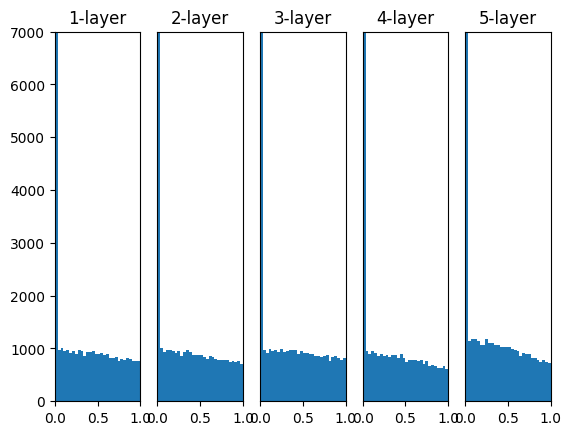

In [7]:
input_data = np.random.randn(1000, 100)  # 1000개의 데이터, 표준정규분포로 1000행 100열 행렬생성
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # ? 초깃값
    w = np.random.randn(???, ???) * ???

    a = np.dot(x, w)

    # 활성화 함수 - ReLU
    z = ???(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.xlim(0.0, 1.0)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#### 2.6. 나타난 활성화 값 분포에 대해 간단하게 설명해주세요. (3점)

답 : 

# **1조**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 정규화 (25점)

#### 1.(3점)
 세션 발표 내용을 참고해서 공변량 변화 (Covariate Shift)에 대해 서술하시오.


(답 서술)

#### 2.(2점)

1번 문제를 바탕으로, Internal Covariate Shift 에 대해 서술하시오.

(답 서술)

#### 3.(2점)

세션 발표 내용을 참고하여 화이트닝(Whitening)에 대해 적으시오.

(답 서술)

#### 4.(3점)
세션 발표 내용을 참고하여 화이트닝의 문제에 대해 적으시오. 또한 이와 연관하여 배치 정규화가 등장하게 된 배경에 대해 적으시오.

(답 서술)

#### 5.(5점)

In [3]:
# 실행해주세요
import torch
import torch.nn as nn
import torch.nn.functional as F

다음은 1D 데이터에 대한 배치 정규화 코드입니다. 빈 코드를 알맞게 채워주세요.

In [4]:
## 문제
class BatchNormalization1D(nn.Module):
    def __init__(self, num_features, eps=1e-5, momentum=0.1):
        super(BatchNormalization1D, self).__init__()

        # Initialize scale and shift parameters
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

        # Initialize moving averages
        self.running_mean = torch.zeros(num_features)
        self.running_var = torch.ones(num_features)

        self.eps = eps
        self.momentum = momentum

    def forward(self, x):
        # Check if we are in training or evaluation mode
        if self.training:
            # Compute the mean and variance of the input
            mean = x.???(dim=0)
            var = x.???(dim=0, unbiased=False)

            # Update running mean and variance
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var

            # Normalize the input
            x_normalized = (x - ???) / torch.????(??? + self.eps)
        else:
            # Normalize using running mean and variance during evaluation
            x_normalized = (x - self.running_mean) / torch.sqrt(self.running_var + self.eps)

        # Scale and shift
        out = self.gamma * x_normalized + self.beta
        return out

SyntaxError: invalid syntax (<ipython-input-4-1fd91adc881b>, line 21)

#### 6.(10점)

다음 코드는 MNIST 데이터를 CNN을 활용하여 분류하는 것입니다. 코드를 알맞게 완성하여 배치 정규화를 사용하였을 때와 사용하지 않았을 때의 성능 격차를 확인해보세요.

In [6]:
### 실행해주세요
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [7]:
## 그냥 실행해주세요
## 배치정규화를 사용하지 않은 모델입니다.

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras import optimizers

def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
model_usual = deep_cnn()
model_usual.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 activation (Activation)     (None, 28, 28, 50)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 50)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 50)        22550     
                                                        

In [9]:
## 문제입니다. 배치정규화 코드를 알맞게 적어넣어 코드를 완성해주세요.
## 단, 모든 Convolution layer 후에 배치 정규화를 실시합니다.

def deep_cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model
model = deep_cnn_advanced()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 activation_7 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 50)        22550     
                                                      

모델이 어떻게 다른지에 대해 적어주세요.

(답 서술)

## 2.드롭아웃, 가중치 감소 (25점)

#### 1.(10점)

세션 발표를 참고하여 드롭아웃의 개념과 원리에 대해 자세히 적어주세요. (순전파, 역전파 시 어떻게 작동되는지 포함)

(답 서술)



#### 2.(5점)

L2정규화와 비교하여 L1정규화의 특징에 대해 서술하시오.

(답 서술)

#### 3.(10점)

주어진 코드를 모두 완성하여 random search와 grid search로 탐색한 최적 하이퍼 파라미터를 적으세요. 코드를 사용하여도 좋습니다.

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 경로에 맞게 불러와주세요
df = pd.read_csv('/content/drive/MyDrive/데이터/creditcard.csv', na_values = '#NAME?')

X = df[['V17', 'V9', 'V6', 'V12']]
Y = df['Class']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30,random_state = 101)

In [12]:
from sklearn.model_selection import ?????

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = ????(estimator = clf, param_distributions = random_search, n_iter = 10,
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [14]:
from sklearn.model_selection import ????

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
72 fits failed out of a total of 144.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [2],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [5, 7, 10],
                         'n_estimators': [20]},
             verbose=5)